In [97]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress 
import pandas as pd

In [98]:
df_mouse_metadata = pd.read_csv("02-Homework/05-Matplotlib/Instructions/Pymaceuticals/data/Mouse_metadata.csv")
df_mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [99]:
#read files

df_study_results = pd.read_csv("02-Homework/05-Matplotlib/Instructions/Pymaceuticals/data/Study_results.csv")
df_study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [100]:
#merge 2 files

merged_data = pd.merge(df_mouse_metadata, df_study_results, on="Mouse ID")
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [101]:
#merged_data.duplicated()

In [102]:
#merged_data.duplicated().sum()

In [103]:
len(merged_data)

1893

In [104]:
#find duplicates

duplicate_mice = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [105]:
duplicate_mice.count()

Mouse ID              5
Drug Regimen          5
Sex                   5
Age_months            5
Weight (g)            5
Timepoint             5
Tumor Volume (mm3)    5
Metastatic Sites      5
dtype: int64

In [106]:
merged_data.drop(merged_data[merged_data['Mouse ID']== 'g989'].index, inplace=True)

In [107]:
len(merged_data)

1880

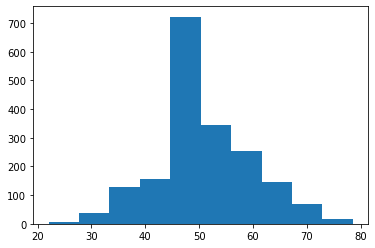

In [108]:
plt.hist(merged_data["Tumor Volume (mm3)"])
plt.show()

In [109]:
#Generate a summary statistics table of the tumour volume for each drug regimen.

tumour_volume_mean = merged_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumour_volume_median = merged_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumour_volume_std = merged_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumour_volume_var = merged_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumour_volume_sem = merged_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
#print(tumour_volume_mean)
#print(tumour_volume_median)
#print(tumour_volume_std)
#print(tumour_volume_var)
#print(tumour_volume_sem)

In [110]:
#create a summary statistic table

summary_statistics_table_df=pd.DataFrame(tumour_volume_mean)
summary_statistics_table_df['tumour_volume_median']=tumour_volume_median
summary_statistics_table_df['tumour_volume_std']=tumour_volume_std
summary_statistics_table_df['tumour_volume_var']=tumour_volume_var
summary_statistics_table_df['tumour_volume_sem']=tumour_volume_sem

summary_statistics_table_df   

,Tumor Volume (mm3),tumour_volume_median,tumour_volume_std,tumour_volume_var,tumour_volume_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [111]:
summary_statistics_table_df.rename({'Tumor Volume (mm3)': 'Tumor Volume Mean'}, axis=1, inplace=True)
summary_statistics_table_df

,Tumor Volume Mean,tumour_volume_median,tumour_volume_std,tumour_volume_var,tumour_volume_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [112]:
# create a bar plot that shows the number of total mice for each treatment regimen throughout the course of the study.
total_mice_per_treatment = merged_data.groupby('Drug Regimen').nunique()['Mouse ID']
total_mice_per_treatment

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

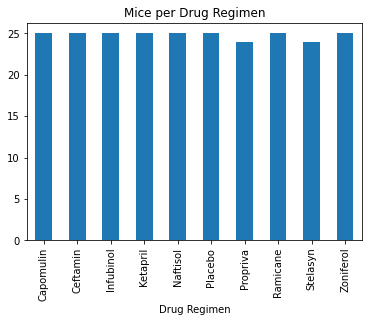

In [113]:
graphic_df = total_mice_per_treatment.plot.bar(title='Mice per Drug Regimen')

In [114]:
total_mice = merged_data.groupby(['Drug Regimen']).nunique('Mouse ID')
total_mice 

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,25,2,15,9,10,206,4
Ceftamin,25,2,15,6,10,154,5
Infubinol,25,2,15,7,10,154,5
Ketapril,25,2,15,6,10,164,5
Naftisol,25,2,14,6,10,162,5
Placebo,25,2,18,6,10,157,5
Propriva,24,2,14,6,10,125,5
Ramicane,25,2,15,9,10,204,4
Stelasyn,24,2,14,6,10,158,5


In [115]:
total_mice_per_sex = merged_data.groupby('Sex').nunique()['Mouse ID']
total_mice_per_sex

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

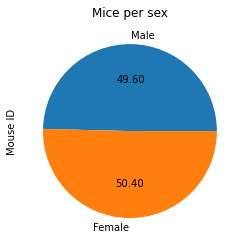

In [116]:
#Generate a pie plot that shows the distribution of female or male mice in the study.
total_mice_per_sex.plot.pie(title='Mice per sex', labels=["Male","Female"],  autopct='%.2f')
plt.show()

In [117]:
#Calculate the final tumour volume of each mouse and get the last (greatest) timepoint for each mouse
final_tumour_each_mouse = merged_data.groupby('Mouse ID').max()['Timepoint']
final_tumour_each_mouse_df=pd.DataFrame(final_tumour_each_mouse)

In [118]:
#get two data together
combine_final_data_df = pd.merge(final_tumour_each_mouse_df, merged_data, on=('Mouse ID','Timepoint'))
combine_final_data_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [119]:
#Calculate the final tumour volume of each mouse across four of the most promising treatment regimens

Final_tumourvolume_Capomulin = combine_final_data_df.loc[combine_final_data_df["Drug Regimen"]=="Capomulin"]
Final_tumourvolume_Ramicane = combine_final_data_df.loc[combine_final_data_df["Drug Regimen"]=="Ramicane"]
Final_tumourvolume_Infubinol = combine_final_data_df.loc[combine_final_data_df["Drug Regimen"]=="Infubinol"]
Final_tumourvolume_Ceftamin = combine_final_data_df.loc[combine_final_data_df["Drug Regimen"]=="Ceftamin"]

tumourvolume_Capomulin = Final_tumourvolume_Capomulin['Tumor Volume (mm3)']
tumourvolume_Ramicane = Final_tumourvolume_Ramicane['Tumor Volume (mm3)']
tumourvolume_Infubinol = Final_tumourvolume_Infubinol['Tumor Volume (mm3)']
tumourvolume_Ceftamin = Final_tumourvolume_Ceftamin['Tumor Volume (mm3)']

In [120]:
#Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

Capomulin_quartiles=tumourvolume_Capomulin.quantile([.25,.75])
Ramicane_quartiles=tumourvolume_Ramicane.quantile([.25,.75])
Infubinol_quartiles=tumourvolume_Infubinol.quantile([.25,.75])
Ceftamin_quartiles=tumourvolume_Ceftamin.quantile([.25,.75])

Capomulin1=Capomulin_quartiles[.25]
Ramicane1=Ramicane_quartiles[.25]
Infubinol1=Infubinol_quartiles[.25]
Ceftamin1=Ceftamin_quartiles[.25]

Capomulin2=Capomulin_quartiles[.75]
Ramicane2=Ramicane_quartiles[.75]
Infubinol2=Infubinol_quartiles[.75]
Ceftamin2=Ceftamin_quartiles[.75]

#IQR

IQR_Capomulin = Capomulin2-Capomulin1
IQR_Ramicane = Ramicane2-Ramicane1
IQR_Infubinol = Infubinol2-Infubinol1
IQR_Ceftamin = Ceftamin2-Ceftamin1

# Determine upper and lower bounds
Lower_Capomulin = Capomulin1-(IQR_Capomulin*1.5)
Lower_Ramicane = Ramicane1-(IQR_Ramicane*1.5)
Lower_Infubinol = Infubinol1-(IQR_Infubinol*1.5)
Lower_Ceftamin = Ceftamin1-(IQR_Ceftamin*1.5)

Upper_Capomuli=Capomulin2+(IQR_Capomulin*1.5)
Upper_Ramicane=Ramicane2+(IQR_Capomulin*1.5)
Upper_Infubinol=Infubinol2+(IQR_Capomulin*1.5)
Upper_Ceftamin=Ceftamin2+(IQR_Capomulin*1.5)


In [121]:
#If I want to create a table

summary_table = pd.DataFrame({
    "Quartile_Capomulin1":[Capomulin1],
    "Quartile_Ramicane1":[Ramicane1],
    "Quartile_Infubinol1":[Infubinol1],
    "Quartile_Ceftamin1":[Ceftamin1],
    
    "Quartile_Capomulin2":[Capomulin2],
    "Quartile_Ramicane2":[Ramicane2],
    "Quartile_Infubinol2":[Infubinol2],
    "Quartile_Ceftamin2":[Ceftamin2],
    
    "IQR_Capomulin":[IQR_Capomulin],
    "IQR_Ramicane":[IQR_Ramicane],
    "IQR_Infubinol":[IQR_Infubinol],
    "IQR_Ceftamin":[IQR_Ceftamin],
    
})
summary_table

,Quartile_Capomulin1,Quartile_Ramicane1,Quartile_Infubinol1,Quartile_Ceftamin1,Quartile_Capomulin2,Quartile_Ramicane2,Quartile_Infubinol2,Quartile_Ceftamin2,IQR_Capomulin,IQR_Ramicane,IQR_Infubinol,IQR_Ceftamin
0,32.377357,31.56047,54.048608,48.722078,40.15922,40.659006,65.525743,64.29983,7.781863,9.098537,11.477135,15.577752


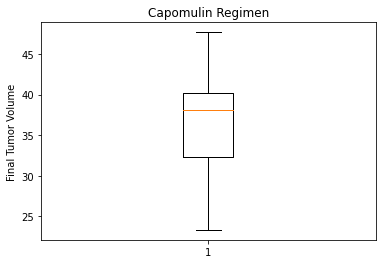

In [122]:
#Create box plot for each of the four regimens of interest

#Capomulin
fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(tumourvolume_Capomulin)
plt.show()

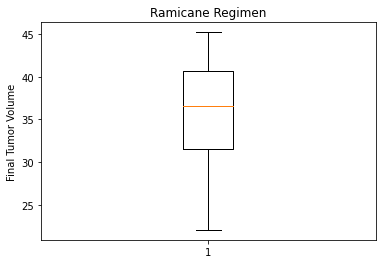

In [123]:
#Ramicane
fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane Regimen')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(tumourvolume_Ramicane)
plt.show()

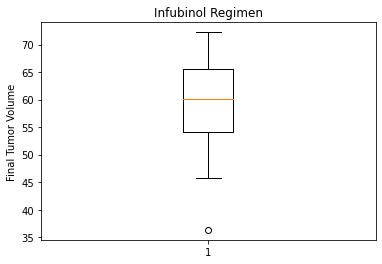

In [124]:
#Infubinol
fig1, ax1 = plt.subplots()
ax1.set_title('Infubinol Regimen')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(tumourvolume_Infubinol)
plt.show()

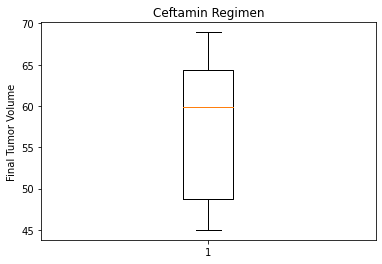

In [125]:
#Ceftamin
fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin Regimen')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(tumourvolume_Ceftamin)
plt.show()

Text(0.5, 1.0, 'Capomulin Regimen')

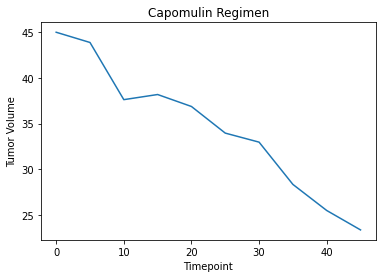

In [126]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Capomulin_mouse = merged_data.loc[merged_data['Drug Regimen']=="Capomulin"]
Capomulin_mouse = merged_data.loc[merged_data['Mouse ID']=="s185"]

plt.plot(Capomulin_mouse['Timepoint'],Capomulin_mouse['Tumor Volume (mm3)'], label="tumor volume")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Capomulin Regimen')

In [127]:
# mouse_Capomulin_df=merged_data.loc[merged_data["Mouse ID"]=="int25"]
# timepoint=mouse_Capomulin_df['Timepoint']
# tumorvolume=mouse_Capomulin_df['Tumor Volume (mm3)']

# plt.plot(timepoint, tumorvolume, label="tumor volume")
# plt.xlabel('Timepoint')
# plt.ylabel('Tumor Volume')
# plt.title('Capomulin Regimen')

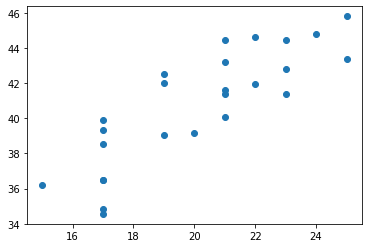

In [128]:
# scatter plot of mouse weight versus average tumour volume for the Capomulin treatment regimen.

weight_mouse = merged_data.loc[merged_data['Drug Regimen']=="Capomulin"]
avg_mouse = weight_mouse.groupby('Mouse ID').mean()

plt.scatter(avg_mouse['Weight (g)'],avg_mouse['Tumor Volume (mm3)'])
plt.show()

In [129]:
#calculatr the correlation coefficient between mouse weight and average tumour volume for the Capomulin treatment
st.pearsonr(avg_mouse['Weight (g)'], avg_mouse['Tumor Volume (mm3)'])


(0.8419363424694721, 1.3225722434712388e-07)

In [132]:
#Generate correlation matrix and find the strongest positive and negative correlations

# df = pd.DataFrame(avg_mouse.corr().unstack().sort_values()).rename(columns={0:"r"})
# df.head()
# df[df["r"]<1]

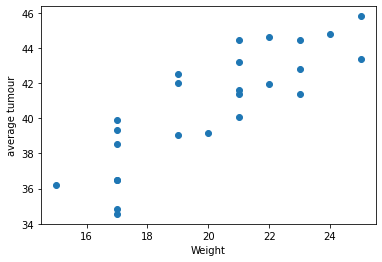

In [135]:
#Calculate the correlation coefficient and linear regression model between mouse weight and average tumour volume for the Capomulin tr

x_values = avg_mouse['Weight (g)']
y_values = avg_mouse['Tumor Volume (mm3)']
plt.scatter(x_values, y_values)
plt.xlabel('Weight')
plt.ylabel('average tumour')
plt.show()

In [141]:
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)

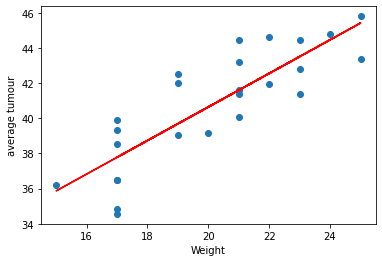

In [142]:
x_values = avg_mouse['Weight (g)']
y_values = avg_mouse['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6, 10), fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('average tumour')
plt.show()